# Linear Regression

Based on [Realpython](https://realpython.com/linear-regression-in-python/), [Scikit-learn](https://scikit-learn.org/stable/modules/linear_model.html), and [Datacamp](https://www.datacamp.com/community/tutorials/essentials-linear-regression-python)

In [ ]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error as mse

## Format

In [ ]:
x = np.array([5, 15, 25, 35, 45, 55])
x

array([ 5, 15, 25, 35, 45, 55])

In [ ]:
X = x[:, np.newaxis]
X

array([[ 5],
       [15],
       [25],
       [35],
       [45],
       [55]])

## Example 1

In [ ]:
# Data
x = np.array([5, 15, 25, 35, 45, 55])
X = x[:, np.newaxis]
y = np.array([5, 20, 14, 32, 31, 38])

In [ ]:
#Generating a linear regression model, which is a line in this case
model = LinearRegression().fit(X, y)

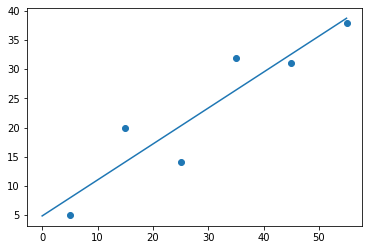

In [ ]:
#Plotting the data:
plt.scatter(x, y)

#Plotting the regression line:
xfit = np.linspace(0, 55, 1000) #1000 evenly spaced points in [0, 55]
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit) 
plt.plot(xfit, yfit)

plt.show()

### Prediction

In [ ]:
#Using the model for making redictions:
model.predict([[20]])

array([17.16190476])

## Example 2

In [ ]:
#Generating a noisy set

#A random number generator with seed 1:
rng = np.random.RandomState(1)

# 50 random x-values:
x = 10 * rng.rand(50) #an array with 50 random samples in the range [0,10) from the uniform distribution
X = x[:, np.newaxis]

# 50 y-values with added noise:
noise = rng.randn(50) #an array with 50 random samples from the normal distribution with mean 0 and variance 1.
y = 2 * x - 5 + noise #a line with added noise

In [ ]:
# Create a model and fit it to the data:
model = LinearRegression().fit(X, y)

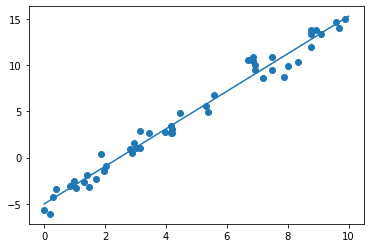

In [ ]:
# Plot the data
plt.scatter(x, y)

#Plot the model
xfit = np.linspace(0, 10, 1000) #1000 evenly spaced points in [0, 10].
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)
plt.plot(xfit, yfit)

plt.show()

In [ ]:
#We almost get the slope 2 and intercept -5 back:
(model.coef_,model.intercept_)

(array([2.02720881]), -4.998577085553204)

### Regularization

In [ ]:
#Ridge regularization
ridge_model = Ridge(alpha=0.5).fit(X, y)

#Coefficients:
(ridge_model.coef_,ridge_model.intercept_)

(array([2.02503592]), -4.988430196209561)

In [ ]:
#Lasso regularization
lasso_model = Lasso(alpha=0.1).fit(X, y)

#Coefficients:
(lasso_model.coef_,lasso_model.intercept_)

(array([2.01647866]), -4.94846987873007)

## Example 3

In [ ]:
X = np.array([[0, 0], [0, 0], [1, 1]])
y = np.array([0, 0.1, 1])

In [ ]:
#Generating a linear regression model, which is a plane in this case
model = LinearRegression().fit(X, y)

In [ ]:
#Now there are two coefficients and one constant:
(model.coef_,model.intercept_)

(array([0.475, 0.475]), 0.050000000000000155)

In [ ]:
model.predict([[1, 1]])

array([1.])

In [ ]:
#Ridge regularization
ridge_model = Ridge(alpha=0.5).fit(X, y)

(ridge_model.coef_,ridge_model.intercept_)

(array([0.34545455, 0.34545455]), 0.13636363636363638)

In [ ]:
#Lasso regularization
lasso_model = Lasso(alpha=0.1).fit(X, y)

(lasso_model.coef_,lasso_model.intercept_)

(array([0.5, 0. ]), 0.20000000000000004)

## Example 4

In [ ]:
X, y = datasets.load_boston(return_X_y=True)

In [ ]:
model = LinearRegression().fit(X, y)

In [ ]:
y_pred = model.predict(X)

In [ ]:
mse(y_pred, y)

21.894831181729202